<img src="https://github.com/hernancontigiani/ceia_memorias_especializacion/raw/master/Figures/logoFIUBA.jpg" width="500" align="center">


# Procesamiento de lenguaje natural
## Bert Sentiment Analysis
[Ejemplo similar en Pytorch](https://colab.research.google.com/drive/1PHv-IRLPCtv7oTcIGbsgZHqrB5LPvB7S#scrollTo=m_mRflxPl32F)

In [1]:
!pip install transformers --quiet

In [2]:
import tensorflow
from transformers import TFBertModel

## 3 clases

In [3]:
# Importamos la primera parte: encoder
bert_model = TFBertModel.from_pretrained("bert-base-uncased")

c:\Users\CBureu\.virtualenvs\NLP-nFxjlPDT\Lib\site-packages\huggingface_hub\file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFBertModel: ['cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.bias', 'cls.predictions.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.dense.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.LayerNorm.bias']
- This IS expected if you are initializing TFBertModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFBertModel were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions w

In [4]:
# Para modelos 1 y 2
max_length = 140
output_shape = 3

In [5]:
bert_model.bert.trainable = False

input_ids = tensorflow.keras.layers.Input(shape=(max_length,), dtype=tensorflow.int32, name='input_ids')
attention_mask = tensorflow.keras.layers.Input(shape=(max_length,), dtype=tensorflow.int32, name='attention_mask')

outputs = bert_model(input_ids, attention_mask=attention_mask)

pooled_output = outputs.pooler_output

x = tensorflow.keras.layers.Dropout(0.2)(pooled_output)
output = tensorflow.keras.layers.Dense(output_shape, activation='softmax')(x)

model_1 = tensorflow.keras.Model(inputs=[input_ids, attention_mask], outputs=output)

model_1.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy',tensorflow.keras.metrics.F1Score(average='macro')])

In [6]:
model_1.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_ids (InputLayer)      [(None, 140)]                0         []                            
                                                                                                  
 attention_mask (InputLayer  [(None, 140)]                0         []                            
 )                                                                                                
                                                                                                  
 tf_bert_model (TFBertModel  TFBaseModelOutputWithPooli   1094822   ['input_ids[0][0]',           
 )                           ngAndCrossAttentions(last_   40         'attention_mask[0][0]']      
                             hidden_state=(None, 140, 7                                       

## 3 clases + capa densa

In [7]:
# Usamos la misma parte de input y attention
x2 = tensorflow.keras.layers.Dropout(0.2)(pooled_output)

# Agrego una capa densa
dense2 = tensorflow.keras.layers.Dense(bert_model.config.hidden_size)(x2)

output2 = tensorflow.keras.layers.Dense(output_shape, activation='softmax')(dense2)

model_2 = tensorflow.keras.Model(inputs=[input_ids, attention_mask], outputs=output2)

model_2.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy',tensorflow.keras.metrics.F1Score(average='macro')])

In [8]:
model_2.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_ids (InputLayer)      [(None, 140)]                0         []                            
                                                                                                  
 attention_mask (InputLayer  [(None, 140)]                0         []                            
 )                                                                                                
                                                                                                  
 tf_bert_model (TFBertModel  TFBaseModelOutputWithPooli   1094822   ['input_ids[0][0]',           
 )                           ngAndCrossAttentions(last_   40         'attention_mask[0][0]']      
                             hidden_state=(None, 140, 7                                     

## 5 clases

In [9]:
# Nuevo output_shape
output_shape = 6

In [10]:
# Usamos de base el modelo de las 5 clases
x = tensorflow.keras.layers.Dropout(0.2)(pooled_output)
output = tensorflow.keras.layers.Dense(output_shape, activation='softmax')(x)

model_3 = tensorflow.keras.Model(inputs=[input_ids, attention_mask], outputs=output)

model_3.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy',tensorflow.keras.metrics.F1Score(average='macro')])

model_3.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_ids (InputLayer)      [(None, 140)]                0         []                            
                                                                                                  
 attention_mask (InputLayer  [(None, 140)]                0         []                            
 )                                                                                                
                                                                                                  
 tf_bert_model (TFBertModel  TFBaseModelOutputWithPooli   1094822   ['input_ids[0][0]',           
 )                           ngAndCrossAttentions(last_   40         'attention_mask[0][0]']      
                             hidden_state=(None, 140, 7                                     

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

In [12]:
def plot_train_metrics(history):
    epoch_count = range(1, len(history.history['accuracy']) + 1)
    sns.lineplot(x=epoch_count,  y=history.history['accuracy'], label='train')
    sns.lineplot(x=epoch_count,  y=history.history['val_accuracy'], label='valid')
    plt.show()

### Datos
Utilizaremos como dataset críticas de Google Apps en formato csv.

In [13]:
import requests

# Descargar apps.csv
url_apps = "https://drive.google.com/u/0/uc?id=1S6qMioqPJjyBLpLVz4gmRTnJHnjitnuV&export=download"
r = requests.get(url_apps)
with open("apps.csv", "wb") as f:
    f.write(r.content)

# Descargar reviews.csv
url_reviews = "https://drive.google.com/u/0/uc?id=1zdmewp7ayS4js4VtrJEHzAheSW-5NBZv&export=download"
r = requests.get(url_reviews)
with open("reviews.csv", "wb") as f:
    f.write(r.content)

In [14]:
import pandas as pd
# Armar el dataset
df = pd.read_csv('reviews.csv')
df.head()

,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,sortOrder,appId
0,Andrew Thomas,https://lh3.googleusercontent.com/a-/AOh14GiHd...,Update: After getting a response from the deve...,1,21,4.17.0.3,2020-04-05 22:25:57,"According to our TOS, and the term you have ag...",2020-04-05 15:10:24,most_relevant,com.anydo
1,Craig Haines,https://lh3.googleusercontent.com/-hoe0kwSJgPQ...,Used it for a fair amount of time without any ...,1,11,4.17.0.3,2020-04-04 13:40:01,It sounds like you logged in with a different ...,2020-04-05 15:11:35,most_relevant,com.anydo
2,steven adkins,https://lh3.googleusercontent.com/a-/AOh14GiXw...,Your app sucks now!!!!! Used to be good but no...,1,17,4.17.0.3,2020-04-01 16:18:13,This sounds odd! We are not aware of any issue...,2020-04-02 16:05:56,most_relevant,com.anydo
3,Lars Panzerbjørn,https://lh3.googleusercontent.com/a-/AOh14Gg-h...,"It seems OK, but very basic. Recurring tasks n...",1,192,4.17.0.2,2020-03-12 08:17:34,We do offer this option as part of the Advance...,2020-03-15 06:20:13,most_relevant,com.anydo
4,Scott Prewitt,https://lh3.googleusercontent.com/-K-X1-YsVd6U...,Absolutely worthless. This app runs a prohibit...,1,42,4.17.0.2,2020-03-14 17:41:01,We're sorry you feel this way! 90% of the app ...,2020-03-15 23:45:51,most_relevant,com.anydo


In [15]:
print("Cantidad de críticas:", len(df))

Cantidad de críticas: 15746


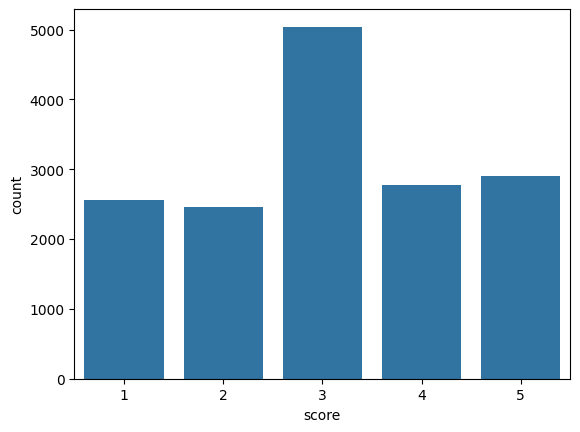

In [16]:
# ¿Cómo están balanceados los datos?
sns.countplot(x=df.score);

## Limpieza de datos: para 3 clases

In [17]:
# Balancear los datos
df['sentiment'] = df.score.apply(lambda x: 0 if x <=2 else 1 if x == 3 else 2)
class_names = ['negative', 'neutral', 'positive']

C:\Users\CBureu\AppData\Local\Temp\ipykernel_12036\1628874736.py:3: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(class_names);


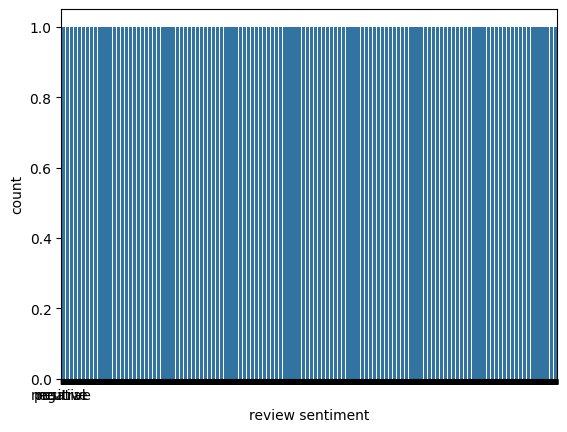

In [18]:
ax = sns.countplot(df.sentiment)
plt.xlabel('review sentiment')
ax.set_xticklabels(class_names);

In [19]:
sentences = df['content'].values
print("sentences shape:", sentences.shape)
sentences[:3]

sentences shape: (15746,)


array(["Update: After getting a response from the developer I would change my rating to 0 stars if possible. These guys hide behind confusing and opaque terms and refuse to budge at all. I'm so annoyed that my money has been lost to them! Really terrible customer experience. Original: Be very careful when signing up for a free trial of this app. If you happen to go over they automatically charge you for a full years subscription and refuse to refund. Terrible customer experience and the app is just OK.",
       'Used it for a fair amount of time without any problems. Suddenly then asked me to create an account or log using Google or FB. I used my Google one only to discover everything was gone!',
       "Your app sucks now!!!!! Used to be good but now doesn't update until I physically open it up and then close it then scroll and then it finally shows what I want to put on the list!!!!!! And I FRIGGEN paid for this garbage!!!!!!!"],
      dtype=object)

In [20]:
# Importamos numpy
import numpy as np

Median: 139.0


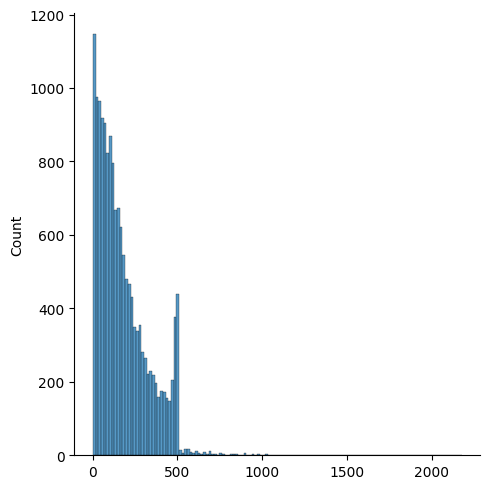

In [21]:
sentence_lens = []

for sentence in sentences:
  sentence_lens.append(len(sentence))

print("Median:", np.median(sentence_lens))
sns.displot(sentence_lens);

In [22]:
# Importamos para categorizar
from tensorflow.keras.utils import to_categorical

In [23]:
y = df['sentiment'].values
print("y shape:", y.shape)
y = to_categorical(y)
print(y[:3])
output_shape = y.shape[1]
print("output shape:", output_shape)

y shape: (15746,)
[[1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]]
output shape: 3


## Data generator


In [24]:
from transformers import InputExample, InputFeatures  # Métodos para transformar el dataset
from transformers import BertTokenizer
import numpy as np

In [25]:
# Muy importante que para tensorflow los modelos Bert deben empezar con "TF"
# de lo contrario estaremos utilizando un modelo para pytorch

# Descargamos el modelo base de BERT más liviano y su correspondiente tokenizer
bert_tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")

c:\Users\CBureu\.virtualenvs\NLP-nFxjlPDT\Lib\site-packages\huggingface_hub\file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


In [26]:
# Del dataset original accederemos a los datos por índices (idx)
# mezclados aleatoriamente
from sklearn.model_selection import train_test_split
max_length = 140 # BERT soporta máximo 512
indices = np.arange(len(sentences))
idx_train_val, idx_test = train_test_split(indices, test_size=0.2, random_state=42)
idx_train, idx_val = train_test_split(idx_train_val, test_size=0.2, random_state=42)

In [27]:
print(idx_train.shape[0], idx_val.shape[0], idx_test.shape[0])

10076 2520 3150


In [28]:
# Esto se necesita ya que la librería de hugging face espera así los datos
def convert_data_to_examples(text, labels, idx_train, idx_val):
    # Armamos un "InputExample" para los datos de entrenamiento y validación
    train_InputExamples = [InputExample(guid=None, # Globally unique ID for bookkeeping, unused in this case
                                                          text_a = text[i],
                                                          text_b = None,
                                                          label = labels[i]) for i in idx_train]

    validation_InputExamples = [InputExample(guid=None, # Globally unique ID for bookkeeping, unused in this case
                                                          text_a = text[i],
                                                          text_b = None,
                                                          label = labels[i]) for i in idx_val]

    return train_InputExamples, validation_InputExamples


def convert_examples_to_tf_dataset(examples, bert_tokenizer, max_length=512):
    # Transformamos los datos de entrada en tensorres de:
    # input_ids --> token id
    # attention_mask
    # token type
    features = []

    for e in examples:
        # Documentation is really strong for this method, so please take a look at it
        input_dict = bert_tokenizer.encode_plus(
            e.text_a,
            add_special_tokens=True,
            max_length=max_length, # truncates if len(s) > max_length
            return_token_type_ids=False,
            return_attention_mask=True,
            padding='max_length', # pads to the right by default # CHECK THIS for pad_to_max_length
            truncation=True
        )

        input_ids, attention_mask = (input_dict["input_ids"], input_dict['attention_mask'])

        features.append(
            InputFeatures(
                input_ids=input_ids, attention_mask=attention_mask, label=e.label
            )
        )

    def gen():
    # Función generadora para no levantar todos los datos en un instante
        for f in features:
            yield (
                {
                    "input_ids": f.input_ids,
                    "attention_mask": f.attention_mask,
                },
                f.label,
            )

    return tensorflow.data.Dataset.from_generator(
        # Tensorflow dataset generator (basado en el generador y en el esquema de datos definido)
        gen,
        ({"input_ids": tensorflow.int32, "attention_mask": tensorflow.int32}, tensorflow.float32),
        (
            {
                "input_ids": tensorflow.TensorShape([None]),
                "attention_mask": tensorflow.TensorShape([None]),
            },
            tensorflow.TensorShape([output_shape]),
        ),
    )

In [29]:
train_InputExamples, validation_InputExamples = convert_data_to_examples(sentences, y, idx_train, idx_val)

train_data = convert_examples_to_tf_dataset(list(train_InputExamples), bert_tokenizer, max_length=max_length)
# shuffle 100 --> mezcla los datos y los lee a de 100 unidades
# batch 32 --> ejecuta una epoca de entrenamiento de a 32 unidades
train_data = train_data.shuffle(100).batch(32)

validation_data = convert_examples_to_tf_dataset(list(validation_InputExamples), bert_tokenizer, max_length=max_length)
validation_data = validation_data.batch(32)

In [30]:
pred_sentences = [sentences[i] for i in idx_test]
tf_batch = bert_tokenizer(pred_sentences, max_length=max_length, padding=True, truncation=True, return_tensors='tf')

In [31]:
X_test = [tf_batch['input_ids'],
          tf_batch['attention_mask']]

In [32]:
y_test = y[idx_test]

# BERT multiclass classification

In [33]:
# Vemos el tamaño de la pooled_output_layer
bert_model.config.hidden_size

768

## Modelo 1

In [34]:
history1 = model_1.fit(train_data, epochs=5, validation_data=validation_data)

Epoch 1/5


315/315 [==============================] - 1579s 5s/step - loss: 1.1150 - accuracy: 0.3981 - f1_score: 0.3924 - val_loss: 1.0358 - val_accuracy: 0.5103 - val_f1_score: 0.4118
Epoch 2/5
315/315 [==============================] - 1554s 5s/step - loss: 1.0323 - accuracy: 0.4661 - f1_score: 0.4573 - val_loss: 0.9712 - val_accuracy: 0.5028 - val_f1_score: 0.4631
Epoch 3/5
315/315 [==============================] - 1555s 5s/step - loss: 1.0009 - accuracy: 0.4930 - f1_score: 0.4831 - val_loss: 0.9455 - val_accuracy: 0.5413 - val_f1_score: 0.4613
Epoch 4/5
315/315 [==============================] - 1547s 5s/step - loss: 0.9795 - accuracy: 0.5167 - f1_score: 0.5063 - val_loss: 0.9207 - val_accuracy: 0.5567 - val_f1_score: 0.4945
Epoch 5/5
315/315 [==============================] - 1546s 5s/step - loss: 0.9615 - accuracy: 0.5196 - f1_score: 0.5088 - val_loss: 0.9525 - val_accuracy: 0.5433 - val_f1_score: 0.4480


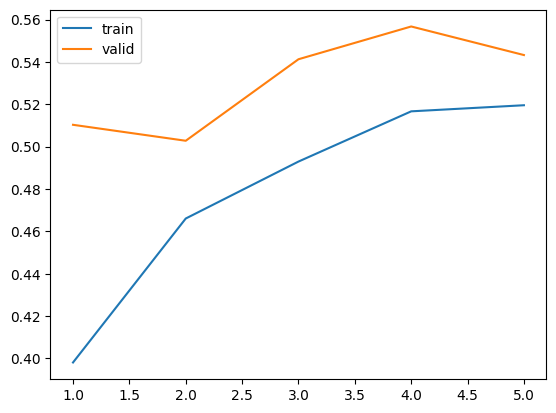

In [35]:
plot_train_metrics(history1)

In [36]:
y_hat_prob = model_1.predict(X_test)
y_hat_prob[:3]

99/99 [==============================] - 364s 4s/step


array([[0.5211703 , 0.2438393 , 0.23499037],
       [0.43036798, 0.19371219, 0.37591982],
       [0.21733753, 0.21974264, 0.56291986]], dtype=float32)

In [37]:
y_hat = np.argmax(y_hat_prob, axis=1)

In [38]:
# Calcular el score
scores = model_1.evaluate(X_test, y_test)
print(f'F1-Score modelo 1: {scores[2]}')

99/99 [==============================] - 363s 4s/step - loss: 0.9426 - accuracy: 0.5511 - f1_score: 0.4509
F1-Score modelo 1: 0.4508638381958008


## Modelo 2

In [39]:
# Entrenamiento modelo 2
history2 = model_2.fit(train_data, epochs=5, validation_data=validation_data)

Epoch 1/5


315/315 [==============================] - 1581s 5s/step - loss: 1.2697 - accuracy: 0.4456 - f1_score: 0.4403 - val_loss: 0.9225 - val_accuracy: 0.5532 - val_f1_score: 0.4814
Epoch 2/5
315/315 [==============================] - 1553s 5s/step - loss: 1.0002 - accuracy: 0.4989 - f1_score: 0.4880 - val_loss: 0.8987 - val_accuracy: 0.5500 - val_f1_score: 0.5191
Epoch 3/5
315/315 [==============================] - 1551s 5s/step - loss: 0.9883 - accuracy: 0.5047 - f1_score: 0.4933 - val_loss: 1.0385 - val_accuracy: 0.4437 - val_f1_score: 0.3530
Epoch 4/5
315/315 [==============================] - 1567s 5s/step - loss: 0.9575 - accuracy: 0.5241 - f1_score: 0.5108 - val_loss: 0.8981 - val_accuracy: 0.5611 - val_f1_score: 0.4915
Epoch 5/5
315/315 [==============================] - 1574s 5s/step - loss: 0.9598 - accuracy: 0.5249 - f1_score: 0.5125 - val_loss: 0.8840 - val_accuracy: 0.5623 - val_f1_score: 0.5110


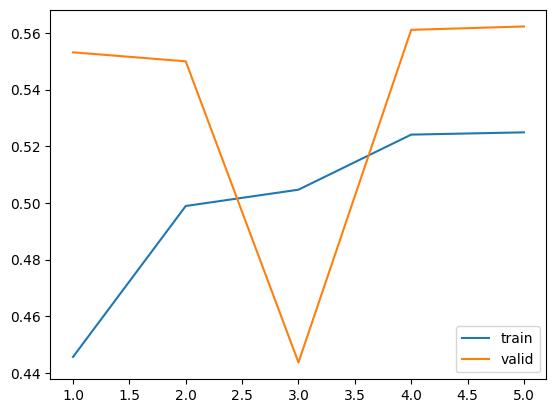

In [40]:
plot_train_metrics(history2)

In [41]:
y_hat_prob = model_2.predict(X_test)
y_hat_prob[:3]

99/99 [==============================] - 364s 4s/step


array([[0.50420403, 0.33526808, 0.16052793],
       [0.35663253, 0.30017453, 0.3431929 ],
       [0.1940514 , 0.33946323, 0.46648544]], dtype=float32)

In [42]:
y_hat = np.argmax(y_hat_prob, axis=1)

In [43]:
# Calcular el score
scores = model_2.evaluate(X_test, y_test)
print(f'F1-Score modelo 2: {scores[2]}')

99/99 [==============================] - 365s 4s/step - loss: 0.8842 - accuracy: 0.5727 - f1_score: 0.5199
F1-Score modelo 2: 0.5199189186096191


## Modelo 3

In [44]:
# Tomamos el score del dataframe original y vemos el shape
y = df.score.values
print("y shape:", y.shape)
y = to_categorical(y)
print(y[:3])
output_shape = y.shape[1]
print("output shape:", output_shape)

y shape: (15746,)
[[0. 1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0.]]
output shape: 6


In [45]:
train_InputExamples, validation_InputExamples = convert_data_to_examples(sentences, y, idx_train, idx_val)

train_data = convert_examples_to_tf_dataset(list(train_InputExamples), bert_tokenizer, max_length=max_length)

train_data = train_data.shuffle(100).batch(32)

validation_data = convert_examples_to_tf_dataset(list(validation_InputExamples), bert_tokenizer, max_length=max_length)
validation_data = validation_data.batch(32)

In [46]:
pred_sentences = [sentences[i] for i in idx_test]
tf_batch = bert_tokenizer(pred_sentences, max_length=max_length, padding=True, truncation=True, return_tensors='tf')

In [47]:
X_test = [tf_batch['input_ids'],
          tf_batch['attention_mask']]

In [48]:
y_test = y[idx_test]

In [49]:
# Entrenamiento modelo 3
history3 = model_3.fit(train_data, epochs=10, validation_data=validation_data)

Epoch 1/10
315/315 [==============================] - 1582s 5s/step - loss: 1.6198 - accuracy: 0.2883 - f1_score: 0.1792 - val_loss: 1.4948 - val_accuracy: 0.3774 - val_f1_score: 0.2138
Epoch 2/10
315/315 [==============================] - 1545s 5s/step - loss: 1.5230 - accuracy: 0.3279 - f1_score: 0.2164 - val_loss: 1.4430 - val_accuracy: 0.3964 - val_f1_score: 0.2661
Epoch 3/10
315/315 [==============================] - 1563s 5s/step - loss: 1.4842 - accuracy: 0.3523 - f1_score: 0.2362 - val_loss: 1.4086 - val_accuracy: 0.4254 - val_f1_score: 0.3114
Epoch 4/10
315/315 [==============================] - 1545s 5s/step - loss: 1.4476 - accuracy: 0.3706 - f1_score: 0.2505 - val_loss: 1.3963 - val_accuracy: 0.4032 - val_f1_score: 0.3000
Epoch 5/10
315/315 [==============================] - 1546s 5s/step - loss: 1.4240 - accuracy: 0.3803 - f1_score: 0.2596 - val_loss: 1.3672 - val_accuracy: 0.4401 - val_f1_score: 0.3229
Epoch 6/10
315/315 [==============================] - 1547s 5s/step - 

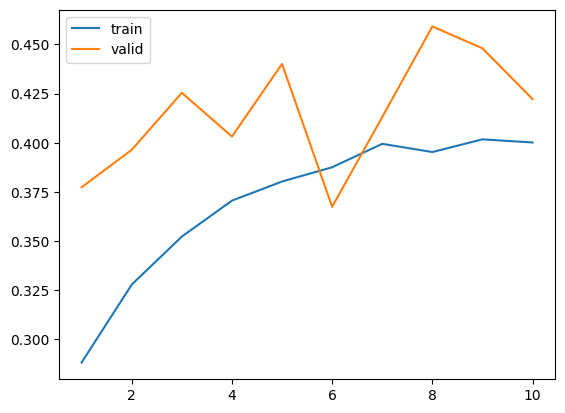

In [50]:
plot_train_metrics(history3)

In [51]:
y_hat_prob = model_3.predict(X_test)
y_hat_prob[:3]

99/99 [==============================] - 363s 4s/step


array([[2.3581221e-07, 3.1255275e-01, 2.9280573e-01, 2.6359388e-01,
        6.9722056e-02, 6.1325356e-02],
       [7.7345550e-07, 2.6090676e-01, 2.8459352e-01, 1.9818766e-01,
        1.1837378e-01, 1.3793753e-01],
       [3.9082991e-07, 1.1179719e-01, 1.7755087e-01, 2.9012349e-01,
        2.1643505e-01, 2.0409296e-01]], dtype=float32)

In [52]:
y_hat = np.argmax(y_hat_prob, axis=1)

In [53]:
# Calcular el score
scores = model_3.evaluate(X_test, y_test)
print(f'F1-Score modelo 3: {scores[2]}')

99/99 [==============================] - 362s 4s/step - loss: 1.3470 - accuracy: 0.4130 - f1_score: 0.3017
F1-Score modelo 3: 0.3017265498638153


# Conclusiones

* Modelo 1 (3 clases):
F1-Score: 0.45086 - 5 épocas
* Modelo 2 (3 clases, con una capa densa):
F1-Score: 0.51991 - 5 épocas
* Modelo 3 (5 clases):
F1-Score: 0.30172 - 10 épocas

Agregar una capa densa aparenta mejorar la performance del modelo, aunque se observan picos que podrían ser mitigados con ajustes adicionales durante el entrenamiento. Sería interesante aumentar el número de épocas para apreciar mejor el desempeño pero el tiempo que demora en fitear es muy alto. 

Además, el rendimiento se ve afectado negativamente al aumentar el número de clases, lo que indica que es importante considerar el equilibrio entre la complejidad del modelo y la capacidad de generalización al diseñar sistemas de clasificación.